[*********************100%***********************]  1 of 1 completed


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1006 entries, 2020-01-02 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1006 non-null   float64
 1   High       1006 non-null   float64
 2   Low        1006 non-null   float64
 3   Close      1006 non-null   float64
 4   Adj Close  1006 non-null   float64
 5   Volume     1006 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 55.0 KB
Number of duplicate rows: 0


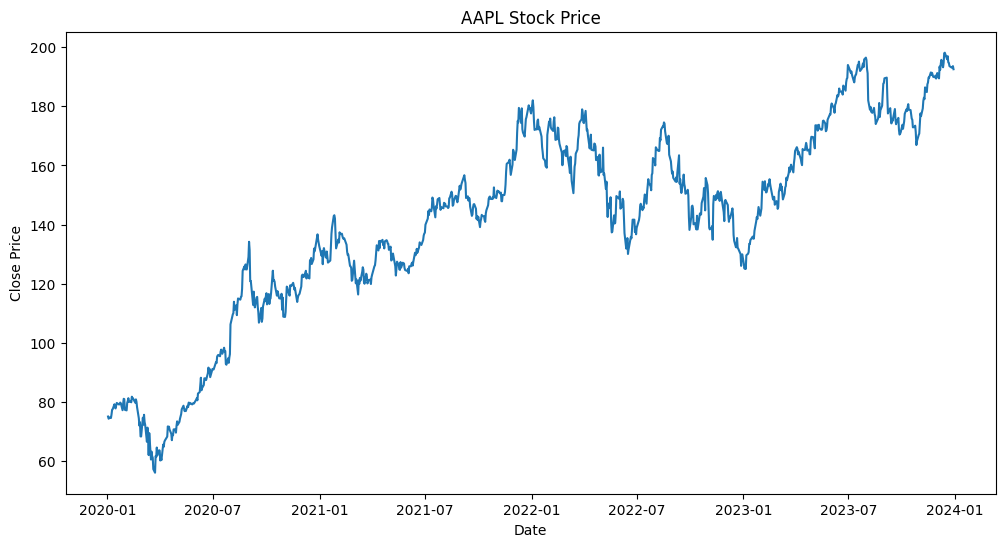

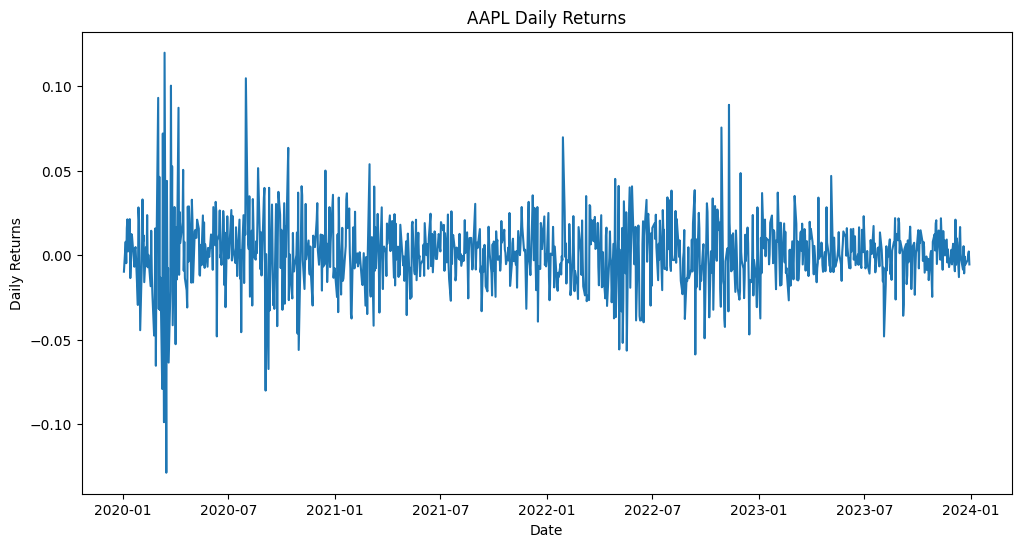

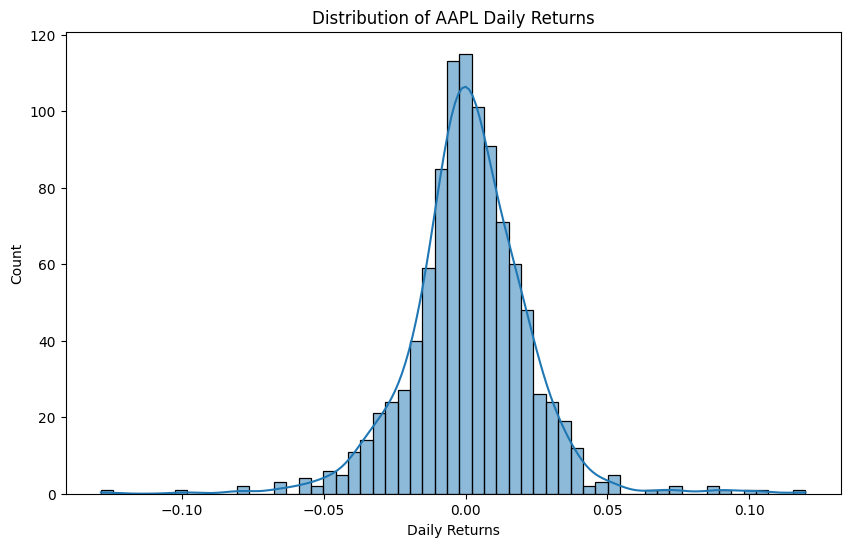

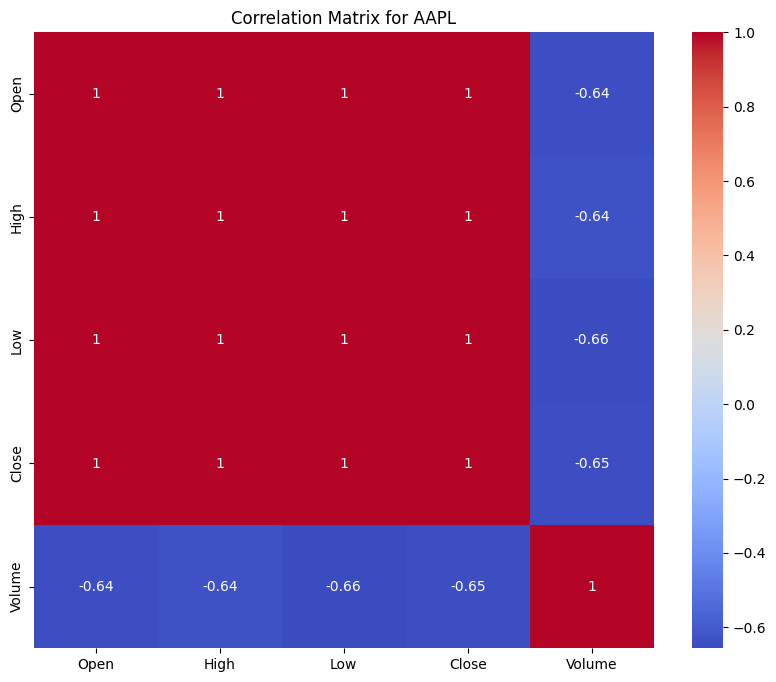

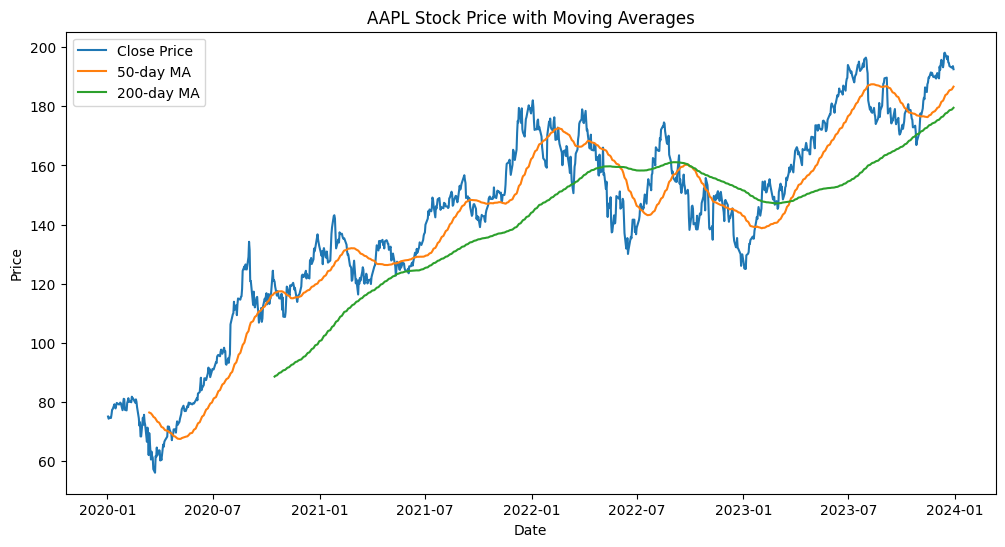

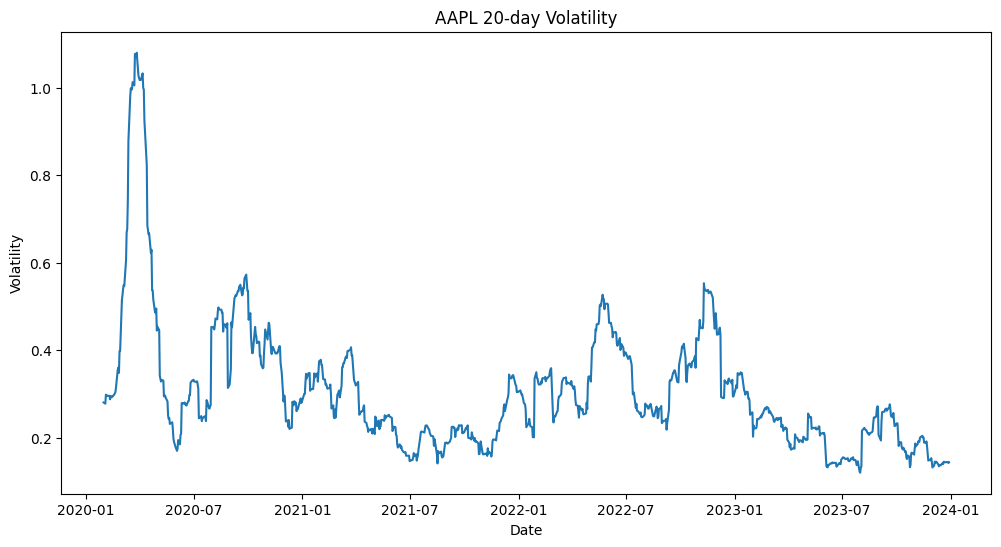

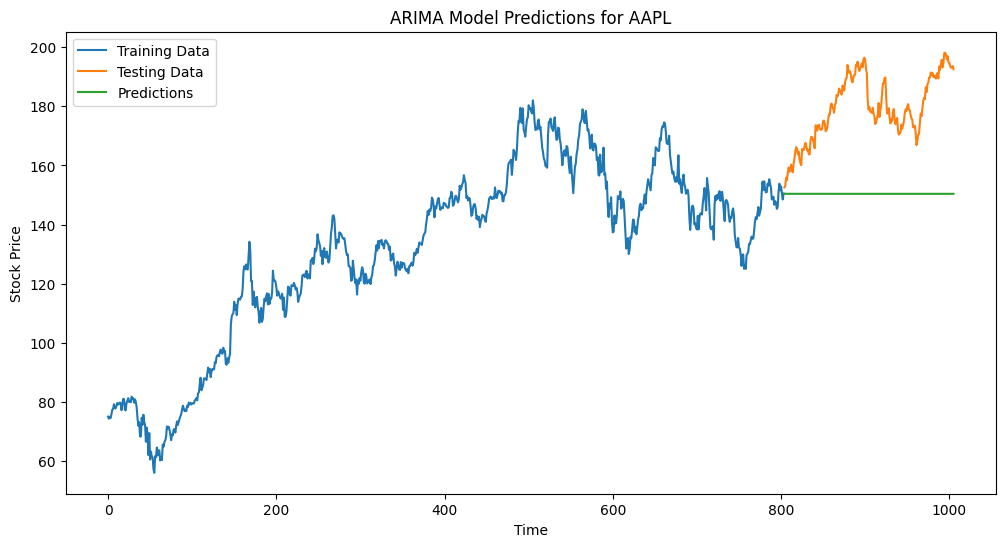

RMSE: 30.83889864818401
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  804
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1955.393
Date:                Sat, 14 Sep 2024   AIC                           3916.786
Time:                        15:46:02   BIC                           3930.851
Sample:                             0   HQIC                          3922.188
                                - 804                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3818      0.383      0.998      0.318      -0.368       1.132
ma.L1         -0.4442      0.374     -1.187      0.235      -1.178       0.289
sigma2         7.6314      0

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 18s 197ms/step - loss: 0.2518 - val_loss: 0.0127
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 269ms/step - loss: 0.0139 - val_loss: 0.0035
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 276ms/step - loss: 0.0078 - val_loss: 0.0034
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 112ms/step - loss: 0.0084 - val_loss: 0.0035
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - loss: 0.0076 - val_loss: 0.0036
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - loss: 0.0088 - val_loss: 0.0034
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - loss: 0.0059 - val_loss: 0.0034
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 139ms/step - loss: 0.0078 - val_loss: 0.0036
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - loss: 0.0069 - val_loss: 0.0031
Epoch 10/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - loss: 0.0061 - val_loss: 0.0032
Epoch 11/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - loss: 0.0069 - val_loss: 0.0041
Epoch 12/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 8

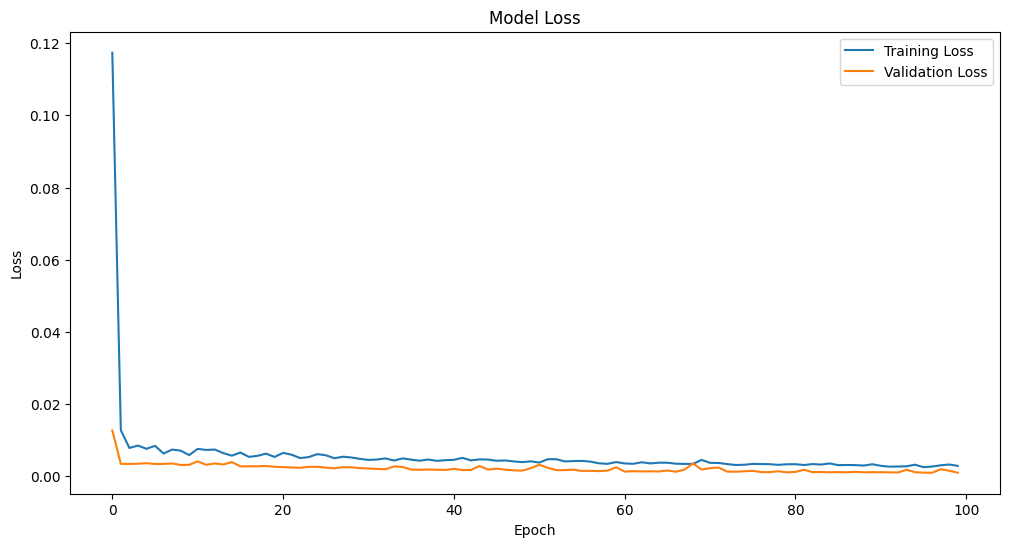

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Train RMSE: 4.382002706718121
Test RMSE: 11.126081055831309


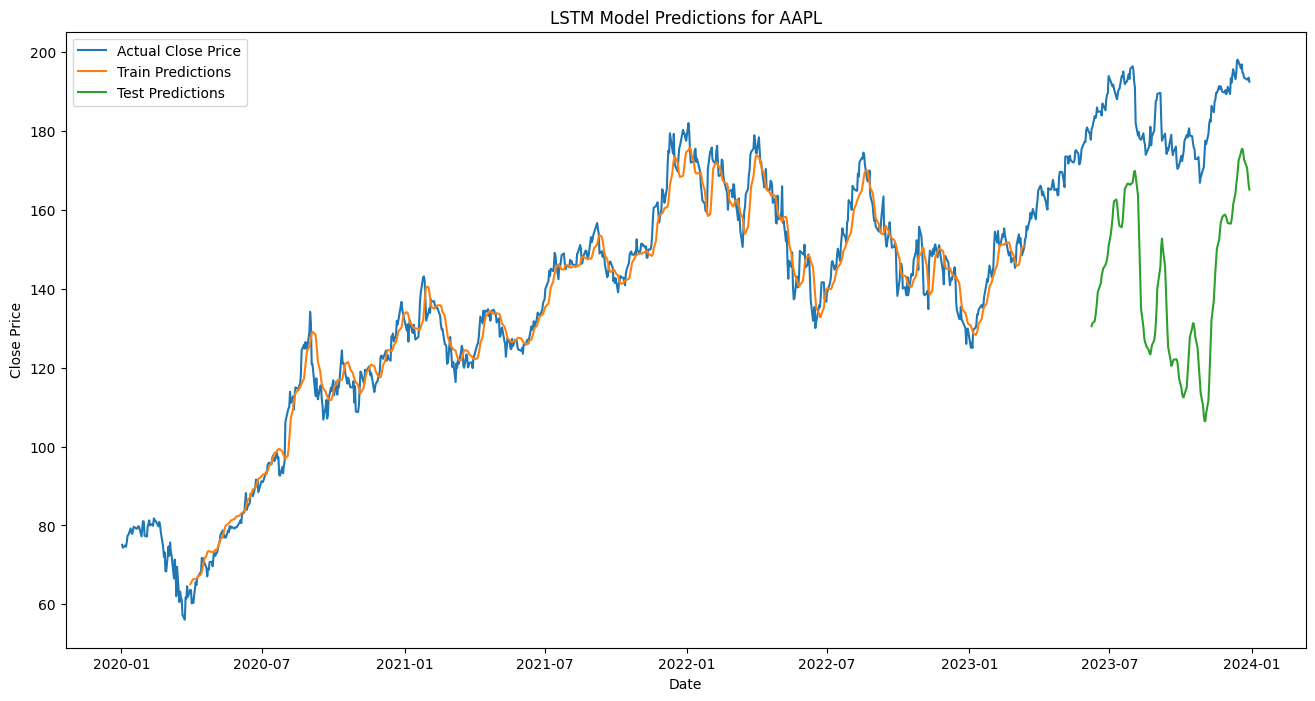

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted price for next day: 186.53286743164062


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import yfinance as yf

def fetch_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

ticker = "AAPL"
start_date = "2020-01-01"
end_date = "2023-12-31"
df = fetch_stock_data(ticker, start_date, end_date)
df

df.info()
df.isnull().sum()
print(f"Number of duplicate rows: {df.duplicated().sum()}")
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'])
plt.title(f'{ticker} Stock Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

df['Returns'] = df['Close'].pct_change()
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Returns'])
plt.title(f'{ticker} Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['Returns'].dropna(), kde=True)
plt.title(f'Distribution of {ticker} Daily Returns')
plt.xlabel('Daily Returns')
plt.show()
correlation_matrix = df[['Open', 'High', 'Low', 'Close', 'Volume']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title(f'Correlation Matrix for {ticker}')
plt.show()

df['MA_50'] = df['Close'].rolling(window=50).mean()
df['MA_200'] = df['Close'].rolling(window=200).mean()
df['Volatility'] = df['Returns'].rolling(window=20).std() * np.sqrt(252)

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Close Price')
plt.plot(df.index, df['MA_50'], label='50-day MA')
plt.plot(df.index, df['MA_200'], label='200-day MA')
plt.title(f'{ticker} Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Volatility'])
plt.title(f'{ticker} 20-day Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.show()
df_arima = df['Close'].reset_index(drop=True)
train_size = int(len(df_arima) * 0.8)
train, test = df_arima[:train_size], df_arima[train_size:]
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()
predictions = model_fit.forecast(steps=len(test))

plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Testing Data')
plt.plot(test.index, predictions, label='Predictions')
plt.title(f'ARIMA Model Predictions for {ticker}')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
rmse = np.sqrt(mean_squared_error(test, predictions))
print(f'RMSE: {rmse}')
print(model_fit.summary())



import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

def prepare_data(data, look_back=60):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data.values.reshape(-1, 1))

    X, y = [], []
    for i in range(look_back, len(scaled_data)):
        X.append(scaled_data[i-look_back:i, 0])
        y.append(scaled_data[i, 0])

    X, y = np.array(X), np.array(y)
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))

    return X, y, scaler

train_size = int(len(df) * 0.8)
train_data = df['Close'][:train_size]
test_data = df['Close'][train_size:]

look_back = 60
X_train, y_train, scaler = prepare_data(train_data, look_back)
X_test, y_test, _ = prepare_data(test_data, look_back)

model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(look_back, 1)),
    Dropout(0.2),
    LSTM(units=50, return_sequences=True),
    Dropout(0.2),
    LSTM(units=50),
    Dropout(0.2),
    Dense(units=1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

train_rmse = np.sqrt(mean_squared_error(y_train[0], train_predict[:,0]))
test_rmse = np.sqrt(mean_squared_error(y_test[0], test_predict[:,0]))
print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')

train_plot = np.empty_like(df['Close'])
train_plot[:] = np.nan
train_plot[look_back:len(train_predict)+look_back] = train_predict[:,0]

test_plot = np.empty_like(df['Close'])
test_plot[:] = np.nan
test_plot[len(train_predict)+(look_back*2):len(df)] = test_predict[:,0]

plt.figure(figsize=(16,8))
plt.plot(df.index, df['Close'], label='Actual Close Price')
plt.plot(df.index, train_plot, label='Train Predictions')
plt.plot(df.index, test_plot, label='Test Predictions')
plt.title(f'LSTM Model Predictions for {ticker}')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

last_60_days = df['Close'][-60:].values.reshape(-1, 1)
last_60_days_scaled = scaler.transform(last_60_days)

X_forecast = []
X_forecast.append(last_60_days_scaled)
X_forecast = np.array(X_forecast)
X_forecast = np.reshape(X_forecast, (X_forecast.shape[0], X_forecast.shape[1], 1))

forecast = model.predict(X_forecast)
forecast = scaler.inverse_transform(forecast)

print(f"Predicted price for next day: {forecast[0][0]}")